In [1]:
import pandas as pd
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints

In [3]:
longMin    = 260
longMax    = 360
latMin     = -75
latMax     = -40
cellWidth  = 5
cellHeight = 2.5

startTime  = '2017-01-01'
endTime    = '2017-02-01'

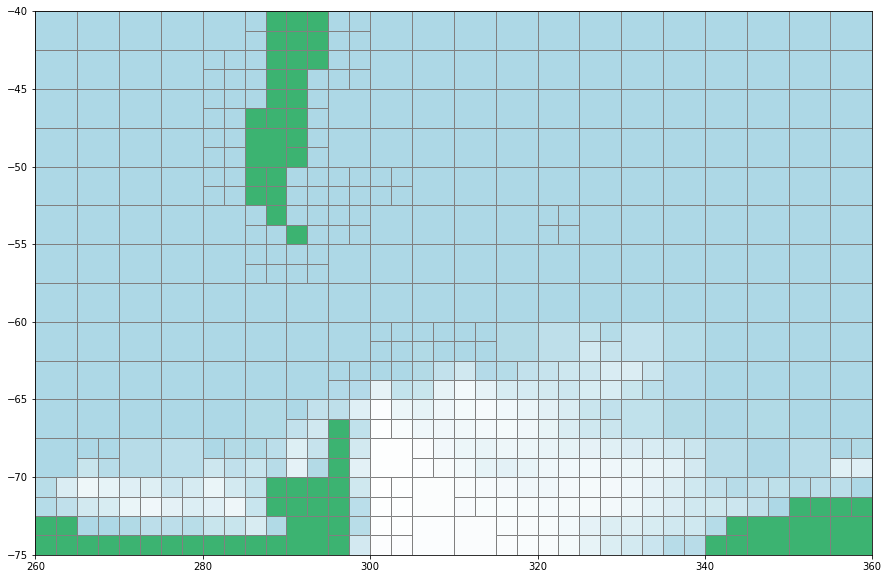

In [23]:
icePoints     = LoadIcePoints('../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc',startTime,endTime)
currentPoints = LoadCurrentPoints('../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')

cellGrid = CellGrid(longMin, longMax, latMin, latMax, cellWidth, cellHeight)
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(1)
cellGrid.plot()

In [24]:
from RoutePlanner.Optimisation import TravelTime
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints_TestExample.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = False
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'hr'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [25]:
TT = TravelTime(cellGrid,OptInfo)
TT.Dijkstra(verbrose=True)

=== Processing Waypoint = ArgentineSea ===
=== Processing Waypoint = MargueriteBay ===


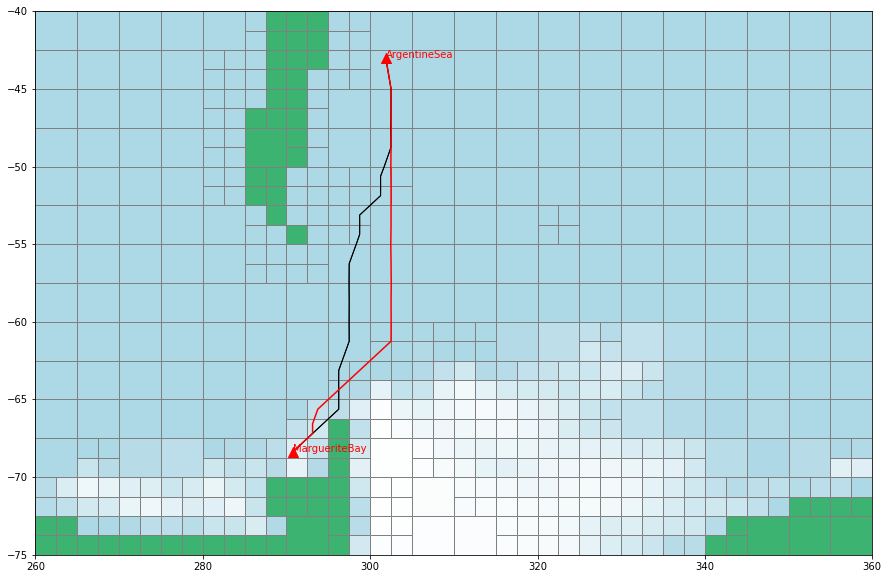

In [26]:
# Loading Ground Truth & Comparing
GT = pd.read_csv('../resources/TestExample_GroundTruth.csv')
GT['Long'] = GT['Long']+360
ax = TT.PlotPaths()
ax.plot(GT['Long'],GT['Lat'],'r')